In [1]:
# 라이브러리 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
# Iris 데이터 (Iris.csv) 불러오기
x_df = pd.read_csv('./Dataset/Iris.csv')
x_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Iris 데이터 
x = x_df.iloc[:, 1:5].values

In [4]:
# 파라미터 설정
num_clusters = 2
n_instances, n_dim = x.shape

In [5]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

* AgglomerativeClustering 하이퍼파라미터

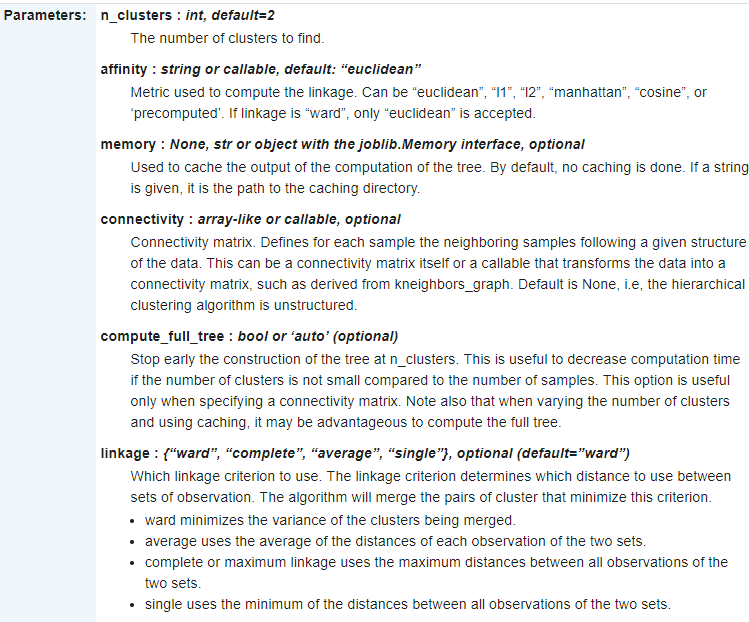

* 두 클러스터간 거리 측정법

![linkage](그림파일/linkage2.png)

In [8]:
ward.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

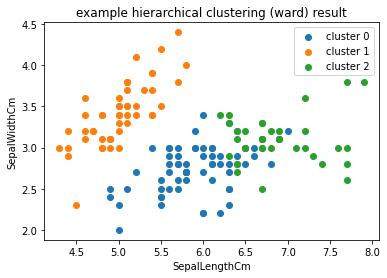

In [36]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in unique_labels:
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [9]:
# 군집 중심 좌표 계산
C = np.zeros([num_clusters, n_dim])
for i in np.unique(ward.labels_):
    C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
C

array([[6.262, 2.872, 4.906, 1.676],
       [5.006, 3.418, 1.464, 0.244]])

# 계층적 군집화에서 덴드로그램을 이용한 군집 수 결정

In [11]:
# 덴드로그램 작성을 위한 linkage matrix 계산
from scipy.cluster.hierarchy import linkage
Z = linkage(x, method = 'ward',  metric='euclidean')

In [12]:
?linkage

metric: euclidean, minkowski, cosine, jaccard, mahalanobis...
(check metrics in scipy.spatial.distance.pdist)

In [13]:
# 덴드로그램 작성
def plot_dendrogram(link_mat, n_clusters, mode=None, truncate_p=100):
    plt.figure()
    plt.title('Hierarchical Clustering (Ward) Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        link_mat,
        color_threshold=Z[1-n_clusters, 2],
        truncate_mode=mode,
        p=truncate_p
    )
    plt.show()

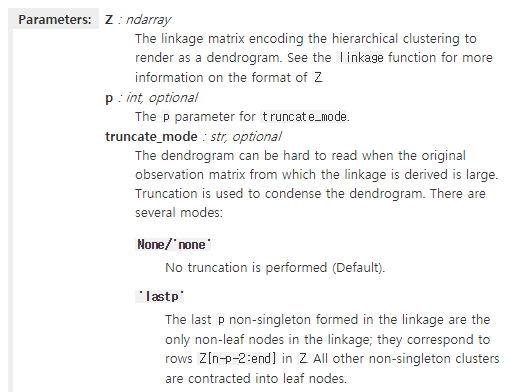

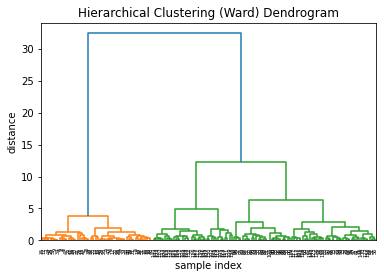

In [14]:
# 덴드로그램 (last 100 aggregation step) 작성
plot_dendrogram(Z, num_clusters)

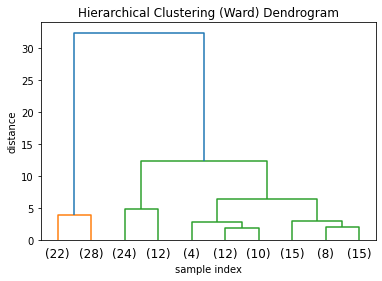

In [16]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)

In [17]:
# 파라미터 설정
num_clusters = 3
n_instances, n_dim = x.shape

In [18]:
# 계층적 군집화 알고리즘 (Agglomerative - Ward) 실행 
ward = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward').fit(x)
# ward.labels_

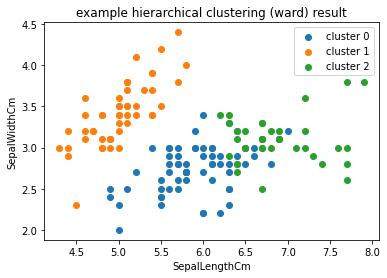

In [19]:
# 계층적 군집화 결과 plotting
unique_labels = np.unique(ward.labels_)

for i in np.unique(ward.labels_):
    cluster_member_mask = (ward.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

In [23]:
# 군집 중심 좌표 계산
def center_print(ward):
    C = np.zeros([num_clusters, n_dim])
    for i in np.unique(ward.labels_):
        C[i, :] = np.mean(x[ward.labels_==i, :], axis=0)
    print(C)
center_print(ward)

[[5.9203125  2.7515625  4.4203125  1.434375  ]
 [5.006      3.418      1.464      0.244     ]
 [6.86944444 3.08611111 5.76944444 2.10555556]]


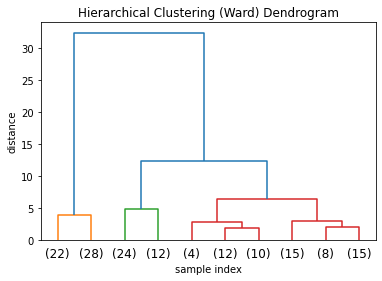

In [21]:
# 덴드로그램 (last 10 step) 작성
plot_dendrogram(Z, num_clusters, mode='lastp', truncate_p=10)

# 실습
### 1. synthetic dataset 불러오기 - pd.read_excel('./Dataset/syn_data.xlsx')
### 2. 마지막 20개 node까지를 p로 설정해 plotting 하기
### 3. dendrogram보고 가장 적합한 클러스터 수를 결정하기
### 4. 적합한 클러스터 수로 데이터를 군집화하고, plotting 하기

In [25]:
var_names = ['x1', 'x2']
x_df = pd.read_excel('./Dataset/syn_data.xlsx', header=None, names=var_names)
x_df

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [58]:
x = x_df.to_numpy()

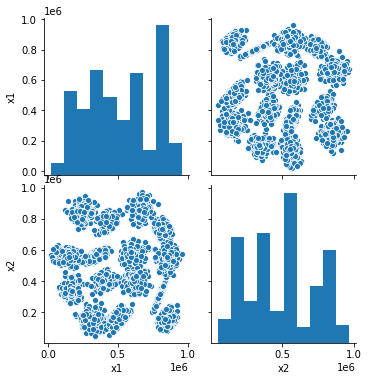

In [31]:
import seaborn as sns

sns.pairplot(x_df[['x1', 'x2']])

In [60]:
Z2 = linkage(x, method = 'ward',  metric='euclidean')

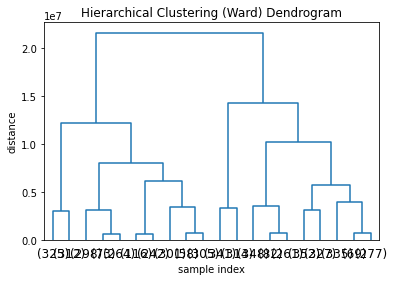

In [61]:
plot_dendrogram(Z2, num_clusters, mode='lastp', truncate_p=20)

In [64]:
ward2 = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward').fit(x)

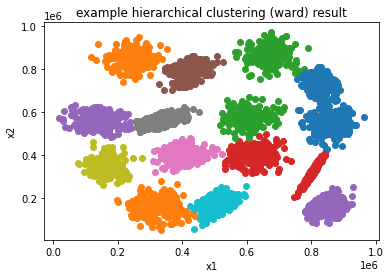

In [67]:
unique_labels = np.unique(ward2.labels_)

for i in unique_labels:
    cluster_member_mask = (ward2.labels_ == i)
    
    x_cluster_i = x[cluster_member_mask, :]
    
    plt.scatter(x_cluster_i[:, 0], x_cluster_i[:, 1], label='cluster ' + str(i))

plt.title('example hierarchical clustering (ward) result')
plt.xlabel('x1')
plt.ylabel('x2')
# plt.legend()
plt.show()

In [66]:
?plt.legend